### linear Regression sklearn

fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달

- 기울기: line_fitter.coef_
- 절편: line_fitter.intercept_

from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()

line_fitter.fit(X, y)

#x값을 넣어 y값 예측하기

y_predicted = line_fitter.predict(X)

In [19]:
#example
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
df1 = df.drop(["Gender"],axis=1)
df1

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


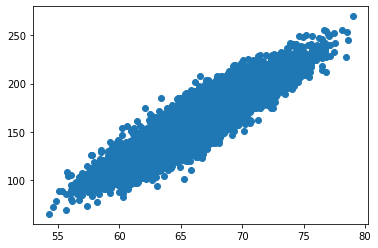

In [25]:
X = df1["Height"]
y = df1["Weight"]
plt.plot(X, y, 'o')
plt.show()

In [26]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [27]:
line_fitter.predict([[70]])

array([189.47294304])

In [28]:
line_fitter.coef_

array([7.71728764])

In [29]:
line_fitter.intercept_

-350.73719181213744

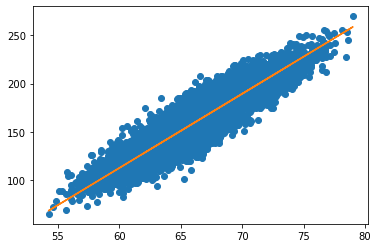

In [30]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

### 5.1 Synthetic Data Generation

Text(0, 0.5, 'y')

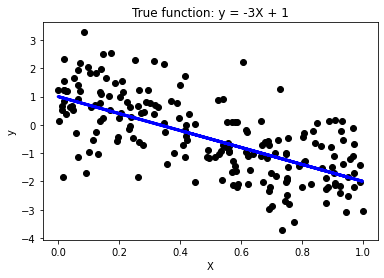

In [3]:
import numpy as np
import matplotlib.pyplot as plt

seed = 1
numInstances = 200
np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X + 1
y=y_true + np.random.normal(size = numInstances).reshape(-1,1)

plt.scatter(X,y,color='black')
plt.plot(X,y_true, color ='blue',linewidth=3)
plt.title('True function: y = -3X + 1')
plt.xlabel('X')
plt.ylabel('y')

### 5.3 Multiple Linear Regression

In [5]:
numTrain = 20
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Create linear regression object
regr = linear_model.LinearRegression()
 
#Fit regression model to the training set
regr.fit(X_train,y_train)

LinearRegression()

In [7]:
#Appply model to the test set
y_pred_test = regr.predict(X_test)

Root mean squared error = 1.0476
R-squared = 0.4443


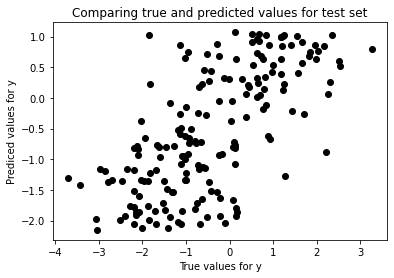

In [8]:
#comparing true versus predicted values
plt.scatter(y_test,y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Prediced values for y')

#Model evaluation
print("Root mean squared error = %.4f" %np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test,y_pred_test))

Slope =  -3.242354544656501
Intercept =  1.0805993038584834


Text(0, 0.5, 'y')

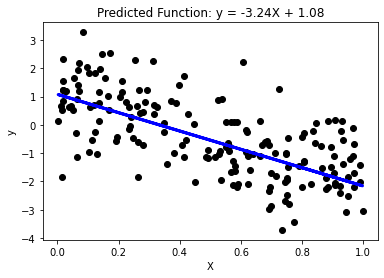

In [10]:
#display model parameters
print('Slope = ',regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

#Plot outputs
plt.scatter(X_test,y_test,color = 'black')
plt.plot(X_test,y_pred_test,color='blue',linewidth=3)
titlestr='Predicted Function: y = %.2fX + %.2f' %(regr.coef_[0],regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')